# Import libraries and data

In [18]:
import pandas as pd
%matplotlib inline

import requests
import zipfile
import io

In [19]:
# URL of the file with data
url = 'https://www.kaggle.com/api/v1/datasets/download/ealaxi/banksim1'

response = requests.get(url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        file_list = z.namelist()
        
        # File I want to read
        file_to_read = 'bs140513_032310.csv'

        if file_to_read in file_list:
            with z.open(file_to_read) as f:
                data = pd.read_csv(f)
        else:
            print(f"{file_to_read} not found in the archive.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

In [17]:
print(data.shape)
data.head()

(594643, 10)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


# Nulls

In [4]:
data.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

# Dtypes

In [5]:
data.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

# Numerical data

In [6]:
data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'fraud'}>, <Axes: >]], dtype=object)

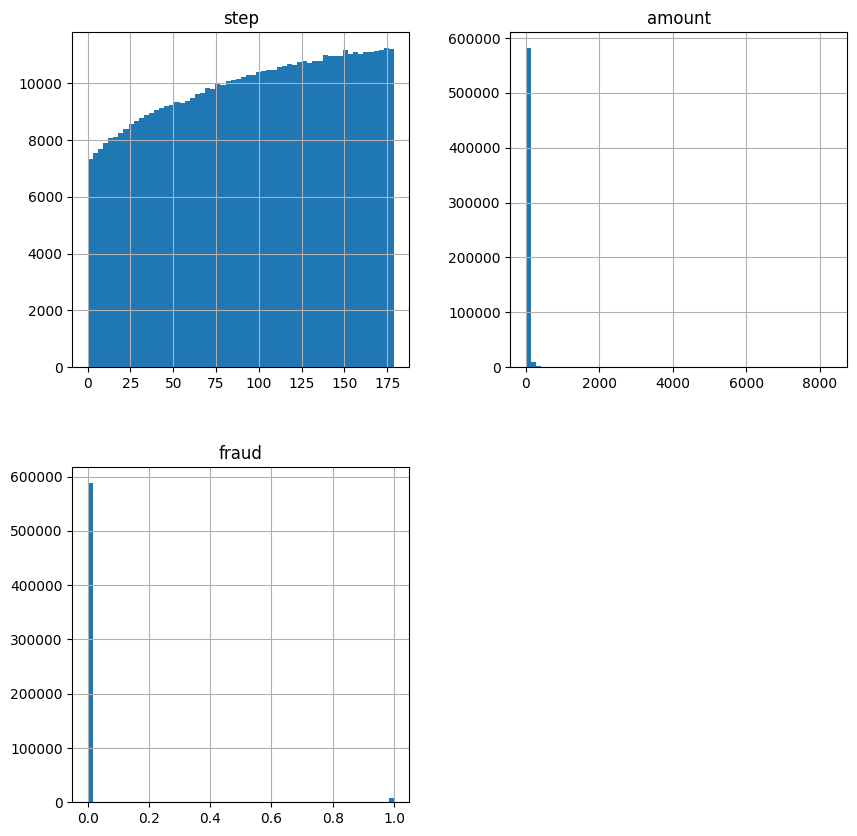

In [7]:
data.hist(bins=60, figsize=(10,10))

In [8]:
data[data['amount'] > 7000].head(n=10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
6710,2,'C375144053','6','F','28007','M732195782','28007','es_travel',7432.48,1
135692,48,'C806399525','2','F','28007','M732195782','28007','es_travel',7665.56,1
227774,77,'C1817318774','2','F','28007','M732195782','28007','es_travel',7272.41,1
329533,107,'C430880678','2','M','28007','M2080407379','28007','es_travel',7403.44,1
383889,122,'C1007572087','2','F','28007','M732195782','28007','es_travel',7635.41,1
456821,142,'C350034124','1','F','28007','M2080407379','28007','es_travel',7134.39,1
513394,158,'C702798720','2','M','28007','M732195782','28007','es_travel',8329.96,1


<Axes: xlabel='index', ylabel='amount'>

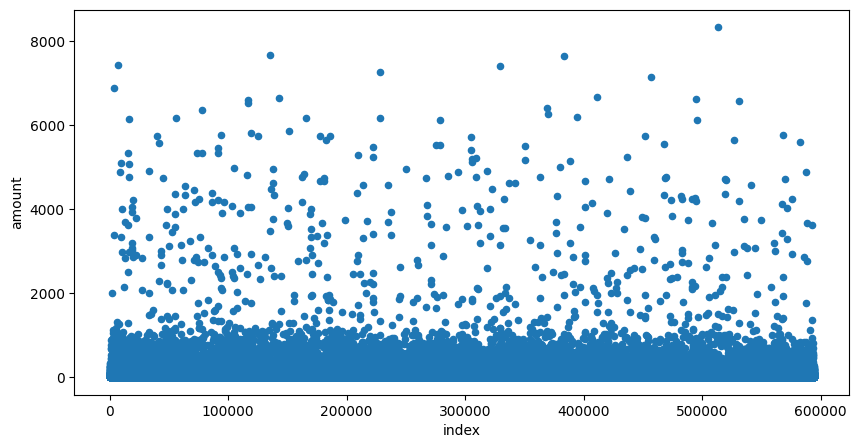

In [9]:
data.reset_index().plot(kind='scatter', y='amount', x= 'index', figsize=(10,5))

# Categorical data

In [10]:
data.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [11]:
data['fraud'].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

In [12]:
data['category'].value_counts()

category
'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: count, dtype: int64

In [13]:
data['gender'].value_counts()

gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64

# Schema

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
